# Computer Vision - Assignment 0 - Introduction to OpenCV

#### Bonus: 4 points   |   Due date: September 30, 23:59   |   Submission site: https://pradogrado2223.ugr.es/

### Student's Full Name: Brian Sena Simons 4ºA - A2  

The first step is to connect with Google Drive and import the suitable libraries. 

In [ ]:
#  We start by getting access to the drive
from google.colab import drive
drive.mount('/content/drive')
import os
# this definition allows to read files in a specific path
get_image = lambda route: os.path.join('/content/drive/MyDrive/images/',route)

Mounted at /content/drive


In [ ]:
# We import the modules to use
import cv2
import numpy as np
from matplotlib import pyplot as plt
# With this backend, the output of plotting commands is displayed inline within 
# frontends like the Jupyter notebook, directly below the code cell that produced 
# it. The resulting plots will then also be stored in the notebook document.
# See https://ipython.readthedocs.io/en/stable/interactive/plotting.html
%matplotlib inline

# Exercise 1

Write a function (`readIm`) that reads an image file and displays it either in grayscale or color. `flagColor` is the variable that determines whether the image is displayed in grayscale or color. Depending on the value of `flagColor` we will have a grayscale image (if `0`) or a color image (if `1`). By default, omitting the `flagColor` parameter makes it `flagColor=1` (color). Show that the function works correctly by displaying one grayscale and one color image. 

## Solution



Como fue comentado en las clases de prácticas, la recomendación fue utilizar "matplotlib" por que posee las herramientas necesarias para la visualización de imágenes, no desordena los canales de colores y además me resulta más cómodo debido a que es una librería utilizada en praćticas anteriores. Es por ello que decidí utilizar-la 

Sin embargo, para este ejercicio de conversión de escala de colores a escala de grises, "matplotlib" no dispone de una función de lectura en formato gris como opencv2 resultó tener tras una breve investigación. Es por ello que mi primer acercamiento fue buscar la fórmula de conversión de escala de colores a escala de grises, que recordaba haber utilizado en "estructura de datos" en años anteriores. (Opción lineal de [rgb_to_grayscale](https://e2eml.school/convert_rgb_to_grayscale.html))


Luego descubrí que PIL y OpenCV2 tienen funciones para realizar la conversión por mediante métodos suyos por lo que decidí también implementar-los.

### Aplicando fórmula: 

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 

def RGB2Gray_Linear(img): 
  cimg = np.zeros(shape=( img.shape[0],img.shape[1],1) )  
  factor = np.array([0.2989,0.5870,0.1140])
  factor.shape=(3,1)
  if len(img.shape)>2 and img.shape[2]!=1: 
    #for row,_ in enumerate(img):
    #  for col,_  in enumerate(img[row]): 
    #    cimg[row,col] = img[row,col,0] * 0.2989 + img[row,col,1]*0.5870 + img[row,col,2]*0.1140 
    #    cimg.shape=(cimg.shape[0],cimg.shape[1])
    cimg[:,:] = img[:,:,:]@factor[:,:]
  else: 
    cimg = img
  # print(cimg.shape) 
  cimg.shape=(img.shape[0],img.shape[1]) 
  return cimg 

def readImForm(filename, flagColor=1):
  # TO BE FILLED BY THE STUDENT
  img = mpimg.imread(filename) 
  if not flagColor:
    cimg = RGB2Gray_Linear(img) 
    return cimg 
  return img # TO BE FILLED BY THE STUDENT

### Solución usando PIL 

Esta solución la descubrí por no saber que tenía que pasar como parámetro a matplotlib la opción "cmap='gray'".[Solución utilizando PIL](https://stackoverflow.com/questions/3823752/display-image-as-grayscale-using-matplotlib)

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
from PIL import Image 

np.random.seed(140421) 

def readImPIL(filename, flagColor=1):
  # TO BE FILLED BY THE STUDENT
  if not flagColor:
    img = Image.open(filename).convert("L") 
    arr = np.asarray(img) 
    return arr 
  img = mpimg.imread(filename) 
  cimg = np.zeros(shape=( img.shape[0],img.shape[1],1) )  
  return img # TO BE FILLED BY THE STUDENT

### Solución usando OpenCV


Esta solución se discutió en clase de prácticas. 

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import cv2 

np.random.seed(140421) 

def readIm(filename, flagColor=1):
  # TO BE FILLED BY THE STUDENT
  img = cv2.imread(filename,flagColor)
  if flagColor: 
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  return img # TO BE FILLED BY THE STUDENT

### Resultados

We display the color version of the `logoOpenCV.jpg` image (three channels: RGB in matplotlib or BGR in OpenCV)

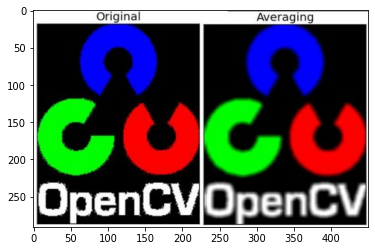

In [ ]:
im_color = readIm(get_image('logoOpenCV.jpg'), 1)
# TO BE FILLED BY THE STUDENT
plt.imshow(im_color)
plt.show()

We display the same image in grayscale (one channel)





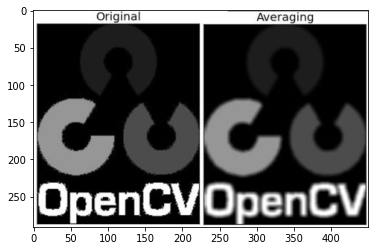

In [ ]:
# TO BE FILLED BY THE STUDENT
im_bn = readIm(get_image('logoOpenCV.jpg'),0)
plt.imshow(im_bn,cmap='gray',vmin=0,vmax=255) 
plt.show() 

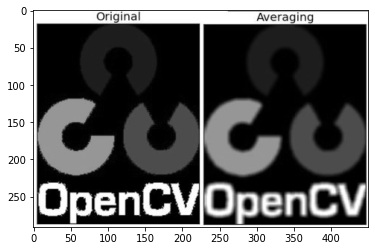

In [ ]:
im_bnFor = readImForm(get_image('logoOpenCV.jpg'),0)
plt.imshow(im_bnFor,cmap='gray',vmin=0,vmax=255) 
plt.show()

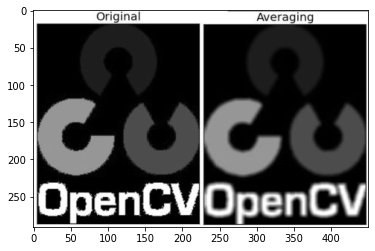

In [ ]:
im_bnPil = readImPIL(get_image('logoOpenCV.jpg'),0)
plt.imshow(im_bnPil,cmap='gray',vmin=0,vmax=255) 
plt.show()

Como vemos, todas las funciones resultan en la misma imágen en escala de grises.
Hemos realizado correctamente la conversión en cada una de ellas. 

---

# Exercise 2

Write a function that displays an array of arbitrary real numbers (that must include positive and negative values). This function should handle images with one and three bands/channels. You have to display visual examples with random images and real images in both scenarios, one-channel (grayscale) and three-channels (RGB). Hint: band values have to be shifted and scaled in the proper range ([0,1]) to avoid information loss.

## Solution

Al hablar de matrices arbitraria tenemos que tener en cuenta que no podemos simplesmente realizar una normalización dividiendo entre el máximo de los valores utilizado para los colores de las imagenes (255). Tenemos que buscar qué máximo tendremos en la matriz en cuestión.

Esta arbritariedad implica que nos surja la cuestión de si normalizar por cada canal o globalmente. El problema está en que podemos tener pérdida de información en relación a los colores. Si no nos importara los colores no tendríamos problemas. 

La razón está en qué al tener máximos y mínimos arbritarios, si normalizamos por canal estaremos dividiendo entre diferentes máximos y causando un variación entre los valores. Por lo que para mantener información de los colores tenemos que buscar el máximo global y dividir todos entre él

La fórmula que vamos utilizar consiste en trasladar el mínimo a 0 ( restar al valor el mínimo encontrado) y luego dividir entre el máximo encontrado. 

### Función de normalización 

In [ ]:
# Función que normaliza un canal de una imagen monobanda
def normalize_grayScale(im): 
  vmin = np.amin(im)
  vmax = np.amax(im)
  # print(vmin, " - ", vmax) 
  # Normalizar cualquier valor a 0-1 
  im[:,:] = (im[:,:]-vmin) / (vmax-vmin) 

  return im 

def rangeDisplay01(im, flag_GLOBAL):
  #check image type (grayscale or color)
  img = np.array(im,dtype=np.float64,copy=True)  
  # print(im.shape) 

  if len(im.shape)==2 or im.shape[2] == 1:
    warn = "[WARNING]: Image is in GrayScale" 
    if flag_GLOBAL: warn += "\n[WARNING]: flag_Global ignored for monoband"  
    print(warn) 
    img = normalize_grayScale(img) 
  elif flag_GLOBAL: 
    # normalize the grayscale image
    # compute range and apply normalization
    try:
      if im.shape[2] == 3:
        print("[WARNING]: Image is in Color") 
        print("[WARNING]: Normalizing globally")
        vmin = np.amin(img)
        vmax = np.amax(img)
        # print(vmin, " - ", vmax) 
        # img[:,:] = (img[:,:]-vmin) / (vmax-vmin) 
        img = (img-vmin) / (vmax-vmin) 
      else:
        print("[ERROR]: Wrong-sized color band" ) 
    except: 
      print("[ERROR]: Wrong-sized color band" ) 
  elif not flag_GLOBAL:
    # normalize each band as a grayscale image 
    try: 
      if im.shape[2] == 3:
        print("[WARNING]: Image is in Color") 
        print("[WARNING]: Normalizing per band")
        img[:,:,0] = normalize_grayScale(img[:,:,0])  
        img[:,:,1] = normalize_grayScale(img[:,:,1])  
        img[:,:,2] = normalize_grayScale(img[:,:,2])  
    except: 
      print("[ERROR]: Wrong-sized color band", img.shape,len(im.shape)) 
  return img

### Resultado Monobanda

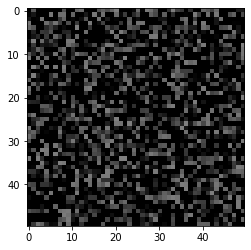

In [ ]:
np.random.seed(140421) 
rand_mono = np.array((np.random.rand(50, 50)-0.5)*255,dtype=int)
plt.imshow(rand_mono,cmap='gray',vmin=0,vmax=255) 
plt.show()

[WARNING]: Image is in GrayScale
[WARNING]: flag_Global ignored for monoband
Número de valores fuera del rango [0-1]:  0


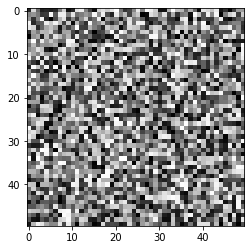

In [ ]:
norm_mono = rangeDisplay01(rand_mono,1)
print("Número de valores fuera del rango [0-1]: ", np.count_nonzero(norm_mono>1)+np.count_nonzero(norm_mono<0))
plt.imshow(norm_mono,cmap='gray',vmin=0,vmax=1) 
plt.show() 

In [ ]:
print(rand_mono[0,0:4],np.amax(rand_mono))
print(norm_mono[0,0:4],np.amax(norm_mono)) 

[-88  89 -23 -95] 127
[0.15354331 0.8503937  0.40944882 0.12598425] 1.0


El resultado de normalizar la matriz de números arbitrarios es que los valores positivos, antes procesados como "gris" por ser cercano a 0 en la escala de 0-255, se pasan a ser casi blancos por esta cerca del máximo. Y los valores negativos ya procesados como negros, terminan escalados de negro a gris según la distancia al mínimo global. 

El resultado es la aparición repentina del color blanco. Podríamos decir que es como "aumentar" el brillo de la imágen. Veremos que con las imágens de color pasa algo diferente. 

### Resultado Multi-canal.

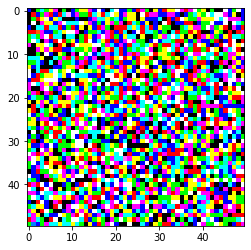

In [ ]:
np.random.seed(2)
rand_multi = (np.random.rand(50, 50, 3)-0.5)*255
plt.imshow(rand_multi) 
plt.show() 

[WARNING]: Image is in Color
[WARNING]: Normalizing per band
Número devalores fuera del rango [0-1]:  0


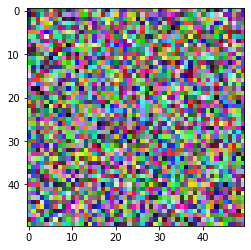

In [ ]:
norm_multi = rangeDisplay01(rand_multi,0)
print("Número devalores fuera del rango [0-1]: ", np.count_nonzero(norm_multi>1)+np.count_nonzero(norm_multi<0))
plt.imshow(norm_multi) 
plt.show()

[WARNING]: Image is in Color
[WARNING]: Normalizing globally
Número devalores fuera del rango [0-1]:  0


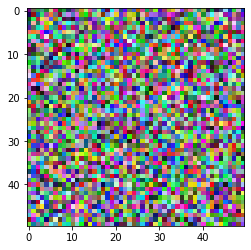

In [ ]:
norm_multiG = rangeDisplay01(rand_multi,1)
print("Número devalores fuera del rango [0-1]: ", np.count_nonzero(norm_multiG>1)+np.count_nonzero(norm_multiG<0))
plt.imshow(norm_multiG) 
plt.show()

Vemos en este ejemplo genérico la normalización por canal o globamente no parece haber afectado nuestra imágen en relación a la paleta de colores. El único resultado evidente es como la menor saturación de la imágen, es como tener los colores más "apagados". 

Sin embargo si miramos los valores máximos y mínimos obtenidos por cada canal vemos porque no hemos perdido información importante sobre los colores: 

In [ ]:
print(np.amax(rand_multi[:,:,0]), np.amax(rand_multi[:,:,1]),np.amax(rand_multi[:,:,2]))
print(np.amin(rand_multi[:,:,0]), np.amin(rand_multi[:,:,1]),np.amin(rand_multi[:,:,2]))

127.28482233845088 127.28853779919531 127.32476852447688
-127.33831801150458 -127.27003687160413 -126.8669813016354


Vemos que los valores son muy cercanos entre sí, por lo que la normalización por canal sería aproximadamente la misma que la normalización global. 
Para ver los efectos de lo que discutimos podemos forjar un ejemplo como sigue: 

[WARNING]: Image is in Color
[WARNING]: Normalizing globally


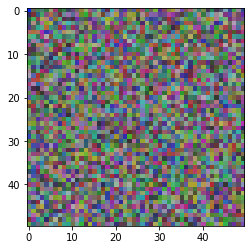

In [ ]:
# Set new minimum / maximum for a particurlar channel 
rand_multi[0][0][0] = -200
rand_multi[0][0][2] = 255
norm_multiT = rangeDisplay01(rand_multi,1)
plt.imshow(norm_multiT)
plt.show()

[WARNING]: Image is in Color
[WARNING]: Normalizing per band


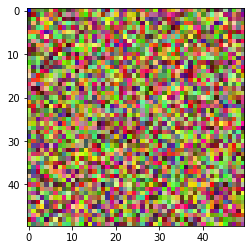

In [ ]:
norm_multiT2 = rangeDisplay01(rand_multi,0)
plt.imshow(norm_multiT2)
plt.show()

Las diferencias son evidentes. Al tener máximos y mínimos distintos en cada canal, la normalización global es la única que preserva la información de los colores en cada imagen.

### Escribir una imagen con título: 

Let's write a function to display any image  with a title

Para realizar este ejercicio, reutilizaremos la función anterior para normalizar las imagenes antes de visualizar-las. 

In [ ]:
def displayIm(im, title='Result',factor= 1, showFlag=True):  
  # Normalize range
  img = rangeDisplay01(im,1) 
  # Display the image
  if len(im.shape) == 3 and im.shape[2]==3:
    # im has three channels
    plt.imshow(img) 
  else:
    # im has a single channel
    plt.imshow(img,cmap='gray',vmin=0,vmax=1) 
  figure_size = plt.gcf().get_size_inches()
  plt.gcf().set_size_inches(factor * figure_size)
  plt.title(title) #adding title
  plt.xticks([]), plt.yticks([]) #axis label off
  if showFlag: plt.show()

### Resultado Imagenes Arbitrarias

Let's test this function using both RGB and gray level images

In [ ]:
rand_mono = (np.random.rand(50, 50)-0.5)*255
rand_multi = (np.random.rand(50, 50, 3)-0.5)*255

[WARNING]: Image is in GrayScale
[WARNING]: flag_Global ignored for monoband


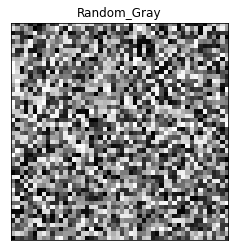

In [ ]:
displayIm(rand_mono,'Random_Gray')

[WARNING]: Image is in Color
[WARNING]: Normalizing globally


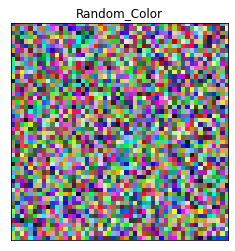

In [ ]:
displayIm(rand_multi, 'Random_Color')

Vemos que para las matrices arbritarias hemos tenido éxito en visualizar-las, y además he optado por preservar el color utilizando la normalización global. 

### Resultado Imagenes Reales.

Let's try with the real images given above. 

[WARNING]: Image is in Color
[WARNING]: Normalizing globally


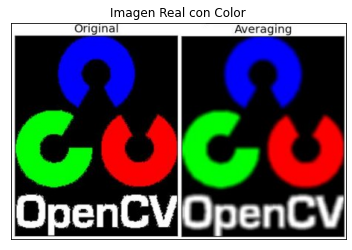

In [ ]:
displayIm(im_color,"Imagen Real con Color")

[WARNING]: Image is in GrayScale
[WARNING]: flag_Global ignored for monoband


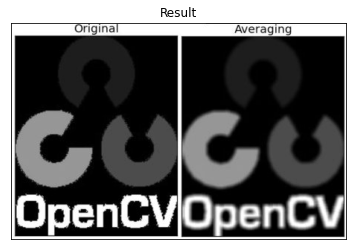

In [ ]:
displayIm(im_bn)

La visualización de imágenes de nuestro conjunto de datos también parecen ser correctas. 

---

# Exercise 3

Write a function that takes as input a sequence/list of images (`vim`) and display them simultaneously on the same canvas. Consider the following cases: (a) images with the same size and number of channels, (b) images with different sizes but the same number of channels, and (c) images with different size and number of channels. Show visual examples of the three scenarios. 

## Solution

Case (a): the student can concatenate the images by rows and columns using the numpy functions vstack() and hstack().

Case (b): Here a good policy could be to insert the largest image in the upper left corner of the canvas and add new images from the left along the bottom and diagonal iteratively.

Case (c): Convert all single-channel images to three-channel images and go to case (b).

Students are allowed to create two functions (`displayMI_ES` and `displayMI_NES`) to separately tackle scenarios (a) and (b)-(c), respectively. 

### Para imágenes del mismo tamaño 

(a) Para el primer caso solamente tenemos que tener en cuenta que para hacer uso de las funciones "hstack" y "vstack" de numpy, ambos vectores a concatener tienen que tener la misma dimensión, por lo que no es tan sencillo como ir concatenando arbitrariamente las imágenes sin ningún orden, ya que tendremos que ir redimensionando el "canvas" (recuadro donde irán las imágenes) según sea conveniente.

Es por ello que opté por utilizar dos variables, el canvas y una temoporal. La idea es expandir horizontalmente hasta completar una fila la variable temporal y luego realizar la expansión en vertical de nuestro canvas. Así que añadimos un nuevo parámetro a nuestra función que determina el número de imágenes por filas (row_size) 

#### Código para imágenes de mismo tamaño 

In [ ]:
def checkChannels(vim):
  same_type = True 
  for i in range(0,len(vim)): 
    for j in range(i,len(vim)): 
      try: 
        # print(vim[i].shape[2],vim[j].shape[2]) 
        if vim[i].shape[2] != vim[j].shape[2]: 
          same_type = False
          break 
      except: 
        # print(len(vim[i].shape),len(vim[j].shape))
        if (len(vim[i].shape)<=2 and (len(vim[j].shape)>2 and vim[j].shape[2]!=1)) or \
       (len(vim[j].shape)<=2 and (len(vim[i].shape)>2 and vim[i].shape[2]!=1)): 
          same_type = False  
          break 
  return same_type

def GRAY2RGB(vim):
  res = vim.copy()
  for i in range(0,len(vim)): 
    if (len(vim[i].shape)>2) and vim[i].shape[2]==3:
      continue 
    else: 
      nimg = np.zeros(shape=(vim[i].shape[0],vim[i].shape[1],3))
      nimg[:,:,0] = vim[i][:,:]
      nimg[:,:,1] = vim[i][:,:]
      nimg[:,:,2] = vim[i][:,:]
      res[i] = nimg.copy()

  return res 

def displayMI_ES(vim, title="Resultado",factor=1,row_size=4,to_gray=False):
  # Let's start with case (a). We concatenate the images by columns, or by rows 
  # and columns, depending on the number of images and their dimensions

  # Check for channel types 
  same_type = checkChannels(vim) 
  if not same_type: 
    if to_gray:
      print("[WARNING]: Not same channels in all images, converting to GrayScale") 
      vim = [RGB2Gray_Linear(img) for img in vim] 
    else:
      vim = GRAY2RGB(vim)

  # Create canvas and temporal variable
  out = temp = np.array(vim[0]) 
  count = 1 
  rows = 0 
  for img in vim[1:]: 
    if count >= row_size: 
      if rows == 0: 
        out = temp 
      else: 
        out = np.vstack((out, temp)) 
      rows = rows + 1 
      temp = np.array(img) 
      count = 1 
    else: 
      temp = np.hstack((temp,img)) 
      count = count + 1 

  if rows == 0: 
    out = temp 
  elif count !=0: 
    try: 
      leftover = np.zeros(shape=(temp.shape[0],out.shape[1],out.shape[2])) 
    except: 
      leftover = np.zeros(shape=(temp.shape[0],out.shape[1])) 
    leftover[:temp.shape[0],:temp.shape[1]] = temp[:,:] 
    out = np.vstack((out,leftover)) 
   
  return displayIm(out,title,factor)

#### Resultados 

Let's display two different configurations

[WARNING]: Image is in Color
[WARNING]: Normalizing globally


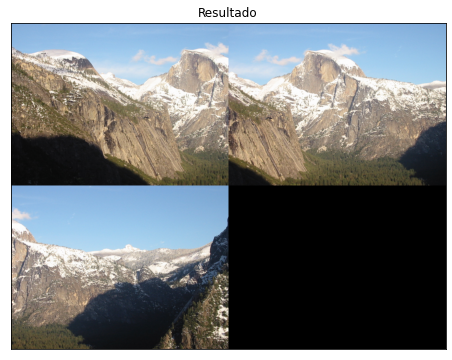

[WARNING]: Image is in Color
[WARNING]: Normalizing globally


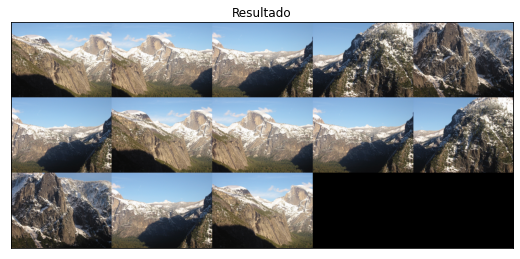

In [ ]:
imcolor_1 = readIm(get_image('yosemite1.jpg'))
imcolor_2 = readIm(get_image('yosemite2.jpg'))
imcolor_3 = readIm(get_image('yosemite3.jpg'))
imcolor_4 = readIm(get_image('yosemite4.jpg'))
imcolor_5 = readIm(get_image('yosemite5.jpg'))
imcolor_6 = readIm(get_image('yosemite5.jpg'),0)
vim=[imcolor_1, imcolor_2, imcolor_3]
displayMI_ES(vim,factor=1.5,row_size=2)
vim=[imcolor_1, imcolor_2, imcolor_3,imcolor_4, imcolor_5, imcolor_3,imcolor_1, imcolor_2, imcolor_3,imcolor_4, imcolor_5, imcolor_3,imcolor_1]
displayMI_ES(vim,factor=1.5,row_size=5)

Vemos que podemos definir la longitud de una fila y tener las imágenes correctamente concatenadas entre ellas. Los espacios sin rellenar se dejan a negro. 

En caso de que tengamos una discrepancia entre los números de canales podemos distinguir entre convertir las imágenes al número de canales más restrictivo o realizar una conversión de la imagen monoband a tri-banda. Para ellos debemos tener en cuenta que una imagen en color gris se mapea a una en color utilizando el mismo valor de gris (intensidad) en cada uno de los canales de colores.

Observen-se las imágenes a continuación: 

[WARNING]: Image is in Color
[WARNING]: Normalizing globally


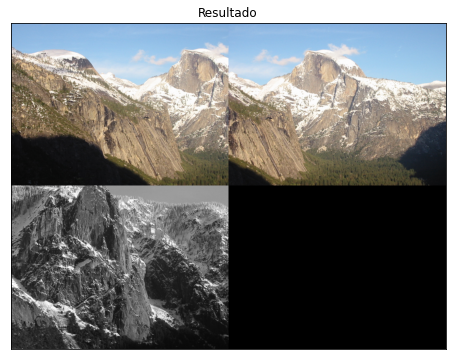

In [ ]:
vim=[imcolor_1, imcolor_2, imcolor_6]
displayMI_ES(vim,factor=1.5,row_size=2,to_gray=False)

[WARNING]: Not same channels in all images, converting to GrayScale
[WARNING]: Image is in GrayScale
[WARNING]: flag_Global ignored for monoband


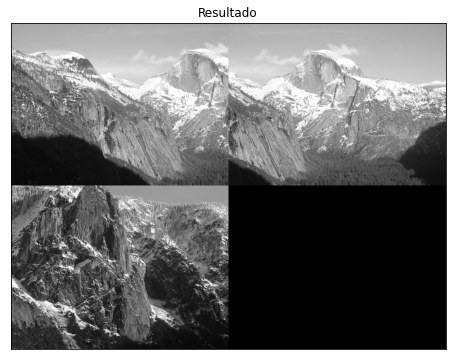

In [ ]:
vim=[imcolor_1, imcolor_2, imcolor_6]
displayMI_ES(vim,factor=1.5,row_size=2,to_gray=True)

### Imágenes de diferente tamaño

Let us now consider the case of images with different sizes but the same number of channels. We can start by placing the first (the largest) in the top-left corner. Then we concatenate by columns and rows the rest of images.

Para este caso la primera idea fue pensar en como solventar el problema de minimizar las areas a rellenar de la concatenación de imágenes. Tras varias vueltas encontré una posibilidad de minimizar el area rellenado. 

Sin embargo, luego descubrí que no era necesario esa implementación, pero aún así la dejo como posibilidad según un parámetro de entrada y lo explico a continuación: 

La idea para concatener parte de tener en cuenta dos "cursores" que nos indica los límites del eje "x" y "y" de nuestra imagen a concatenar. Además, para minimizar tenemos que estimar el mejor orden de imagenes a concatenar. Para ello debemos minimizar uno de los ejes. He optado por minimizar el eje "x". Para ello probamos la mejor combinación de imágenes concatenadas que conlleva a la mínima diferencia de longitud entre filas. 

Una vez tenemos ese orden utilizamos los "cursores" para ir actualizando y posicionando la imagen en nuestro canvas. Que sabemos que tendrá de longitud en el eje "x" lo equivalente a la suma del número de columnas de las "row_size" (número de imagenes por fila) imagenes. Lo mismo ocurre para el eje "y" dónde tendremos que jugar con los índices, haciendo saltos de fila a fila. 

### Código para concatenar

In [ ]:
# Resolver ecuación de minimización del eje x
def getSelection(vim, row_size=4): 
  rows = round(len(vim)/row_size+0.5) 
  print("[WARNING]: Amount of rows needed: ", rows) 
  diff = np.zeros(shape=(rows))
  TempS = Selection = []
  mini = 999999
  num = 0
  for i in range(0,len(vim)): 
    TempS.append(i) 

  for j in range(0,len(vim)): 
    index = 0
    diff[index] = vim[0].shape[1]
    count = 1 
    for i in range(1,len(vim)): 
      TempS[i] += 1 
      TempS[i] = TempS[i]%len(vim)
      while TempS[i]==0:
        TempS[i] += 1 
        TempS[i] = TempS[i]%len(vim)
      
      # Add group wixdth
      if count == 0: 
        diff[index] = vim[TempS[i]].shape[1]
      else: 
        diff[index] += vim[TempS[i]].shape[1] 

      count = count + 1   
      if count == row_size: 
        index = index + 1 
        count = 0 
    #print(TempS) 
    # Calculate minimun 
    suma = 0
    for i in range(0,rows-1): 
      suma += diff[i] - diff[i+1]
    
    if suma<= mini: 
      mini = suma 
      # print("[WARNING]: New Minimun acquired= ", suma) 
      Selection = TempS.copy() 
      
  TempS = []
  for sel in Selection:
    TempS.append(vim[sel])
    
  return Selection, np.array(TempS,dtype=object) 

# Realizar la concatenación de las imagenes 
def displayMI_NES(vim,row_size=4, minimized=True,to_gray=False):
  # Check channels size for sanity 
  same_type = checkChannels(vim) 
  if not same_type: 
    if to_gray: 
      print("[WARNING]: Different channel sizes, converting to GrayScale") 
      vim = [RGB2Gray_Linear(img) for img in vim] 
    else:
      vim = GRAY2RGB(vim) 
  # Get best image order to minimize fill 
  if minimized: 
    order, Selection = getSelection(vim,row_size) 
    print("[WARNING]: The order to minimize filling is: ", order) 
  else: 
    Selection = np.array(vim,copy=True,dtype=object)
    maxi = 0
    for i,sel in enumerate(Selection): 
      if sel.shape[0] + sel.shape[1] >= maxi: 
        maxi = sel.shape[0]+sel.shape[1] 
        index = i
    print("[WARNING]: Swapping positions.", index,0)
    Selection[[0,index]] = Selection[[index,0]]      

  rows = round(len(vim)/row_size+0.5) 
  xsize = ysize = 0 
  # We know that the width is bounded by the row_size first images width
  suma = count = 0 
  for sel in Selection:
    if count == row_size:  
      count = 0 
      xsize=max(xsize,suma)
      suma = 0
    suma += sel.shape[1]
    count = count + 1 
  xsize = max(xsize,suma) 
  # We know that the height is bounded by how many rows we have 
  for i in  range(0,len(Selection[:row_size])):
    suma = 0
    for j in range(0,rows): 
      try: 
        suma += Selection[j*row_size+i].shape[0] 
      except: 
        suma += 0 # No picture under  
      # print(i,j,suma,Selection[j*row_size+i].shape[0]) 
    ysize=max(ysize,suma)
  ysize=max(ysize,suma)

  print("[WARNING]: These are the estimated sizes:", ysize,xsize)  

  try: 
    Canvas = np.zeros(shape=(ysize,xsize,Selection[0].shape[2]),dtype=Selection[0].dtype ) 
  except:
    Canvas = np.zeros(shape=(ysize,xsize),dtype= Selection[0].dtype ) 

  cx = cy = 0
  Boundaries = [] 
  for i in range(0,len(vim)): 
    # Reset x axis bound after every row
    if (i % row_size) == 0: 
      cx = 0 

    #print("Iteration n=", i," = " , cy,cx) 
    #print("NewImage size: ", Selection[i].shape) 
    
    # Only update y_axis boundary after one row 
    if i >= row_size: 
      # indexed = round((i-row_size)/row_size)
      indexed = i-(i%row_size)-row_size
      # print("·jklasdjflkasjdf",indexed)
      for j in range(0,len(Boundaries[indexed:indexed+row_size])):
        if i == j:
          break
          
        #print(i,cx,Selection[i].shape[1], Boundaries[indexed+j][1])
        if j==row_size-1 or cx+Selection[i].shape[1] <= Boundaries[indexed+j][1]:
          try: 
            Cabe = cx<Boundaries[indexed+j-1][0] and cx > Boundaries[indexed+j][0] 
          except: 
            Cabe = False
          # print(Cabe)
          if Cabe:
            cy = Boundaries[indexed+j-1][0]
          else: 
            cy = Boundaries[indexed+j][0] 
            # print("nocabewey",j, cy)
          break

    #print("Pasting image at: ", cy," to ", cy+Selection[i].shape[0], cx, " to ", cx+Selection[i].shape[1]) 

    # Paste image based on boundary 
    try: 
      Canvas[cy:cy+Selection[i].shape[0],cx:cx+Selection[i].shape[1]] = Selection[i] 
    except: 
      diff_y = Selection[i].shape[0] - (Canvas.shape[0] - cy)
      # diff_x = Selection[i].shape[1] - (Canvas.shape[1] - cx)
      try: 
        Canvas.resize((Canvas.shape[0]+diff_y,Canvas.shape[1],Canvas.shape[2])) 
      except: 
        Canvas.resize((Canvas.shape[0]+diff_y,Canvas.shape[1])) 
      xsize = Canvas.shape[1]
      ysize = Canvas.shape[0]
      print("[WARNING]: Canvas resizing needed: " , ysize, xsize) 
      Canvas[cy:cy+Selection[i].shape[0],cx:cx+Selection[i].shape[1]] = Selection[i] 
    # Update x axis boundary after every paste 
    Boundaries.append([cy+Selection[i].shape[0],cx+Selection[i].shape[1]]) 
    cx = cx+Selection[i].shape[1] 
    #print("Updating x bound -> ", cx ) 

  return Canvas 


### Resultados

Para verificar el correcto funcionamiento de mi algoritmo de minimización utilizé un conjunto de imágenes sencillas de diferentes tonos de gris de tamaño asequible para su solución a papel. Lo obtenido coincide con lo esperado como se muestra a continuación: 

[WARNING]: Amount of rows needed:  2
[WARNING]: The order to minimize filling is:  [0, 2, 3, 1]
[WARNING]: These are the estimated sizes: 900 700


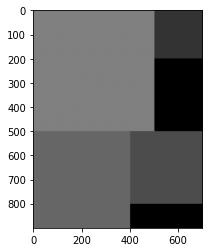

In [ ]:
img1 = np.ones(shape=(500,500))*0.5
img2 = np.ones(shape=(200,200))*0.2
img3 = np.ones(shape=(300,300))*0.3
img4 = np.ones(shape=(400,400))*0.4

vim = [img1,img3,img2,img4] 
outIm = displayMI_NES(vim,row_size=2,minimized=True) 
plt.imshow(outIm,cmap='gray',vmin=0,vmax=1)
plt.show()

Al tener las matrices de tamaño 5x5, 3x3, 2x2, 4x4 es trivial verificar que en uno de los ejes mínimo habrá 7 y en el otro, mínimo, habrá 7 también.

[WARNING]: Amount of rows needed:  2
[WARNING]: The order to minimize filling is:  [0, 2, 3, 1]
[WARNING]: These are the estimated sizes: 826 950
[WARNING]: Image is in Color
[WARNING]: Normalizing globally


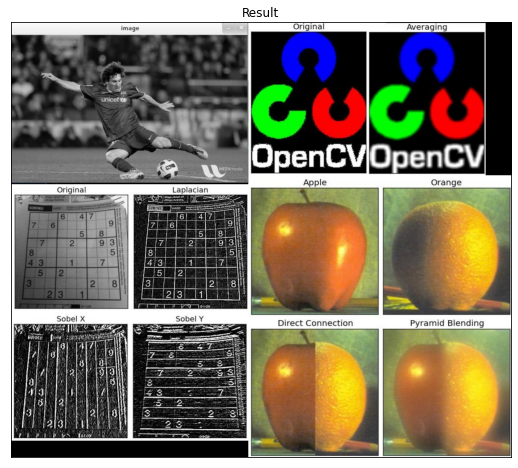

In [ ]:
imcolor_1 = readIm(get_image('dave.jpg'))
imcolor_2 = readIm(get_image('logoOpenCV.jpg'))
imcolor_3 = readIm(get_image('orapple.jpg'))
imcolor_4 = readIm(get_image('messi.jpg'))
vim=[imcolor_4,imcolor_3,imcolor_2,imcolor_1]
#_, temp = getSelection(vim,row_size=2)
#for t in temp:
  #print(t.shape)
outIm=displayMI_NES(vim,row_size=2,minimized=True)
displayIm(outIm,factor=2)

Este es el efecto que produce al utilizar imágenes reales. En cualquier caso, si no se desea ordenar el conjunto de imágenes recaemos en el método que recomienda el enunciado de poner la mayor primero y el resultado es el siguiente: 

[WARNING]: Swapping positions. 1 0
[WARNING]: These are the estimated sizes: 826 950
[WARNING]: Canvas resizing needed:  1022 950
[WARNING]: Image is in Color
[WARNING]: Normalizing globally


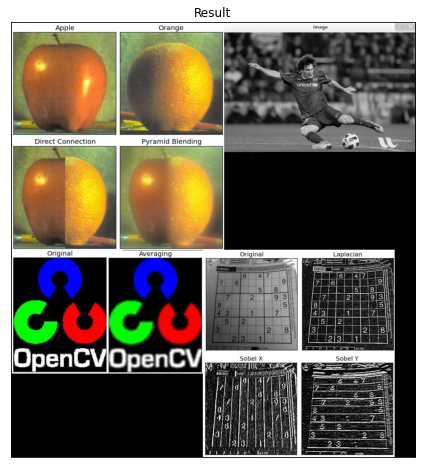

In [ ]:
outIm=displayMI_NES(vim,row_size=2,minimized=False)
displayIm(outIm,factor=2)

Se concatenan siguiente los límites impuestos por los cursores según dónde se vayan a poner, pero no tiene en cuenta su posición relativa. Como podría ser el caso de la última imagen que cabe justo debajo de "messi", lo que permitiría recortar la imagen en el eje "y" y aproximarse a la solución anterior. 

Además, supongamos que leemos una de las imágenes en canal gris, dimensión nxmx1, podemos hacer todas a escala de gris como se muestra a continuación: 

[WARNING]: Different channel sizes, converting to GrayScale
[WARNING]: Amount of rows needed:  2
[WARNING]: The order to minimize filling is:  [0, 2, 3, 1]
[WARNING]: These are the estimated sizes: 826 950
[WARNING]: Image is in GrayScale
[WARNING]: flag_Global ignored for monoband


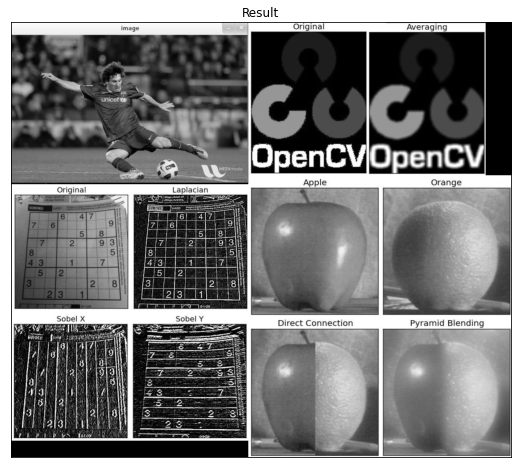

In [ ]:
imcolor_5 = readIm(get_image("orapple.jpg"),0)
vim=[imcolor_4,imcolor_5,imcolor_2,imcolor_1]
outIm=displayMI_NES(vim,row_size=2,minimized=True,to_gray=True)
displayIm(outIm,factor=2)

O podemos transformar la imágen monobanda a tri-banda.

[WARNING]: Amount of rows needed:  2
[WARNING]: The order to minimize filling is:  [0, 2, 3, 1]
[WARNING]: These are the estimated sizes: 826 950
[WARNING]: Image is in Color
[WARNING]: Normalizing globally


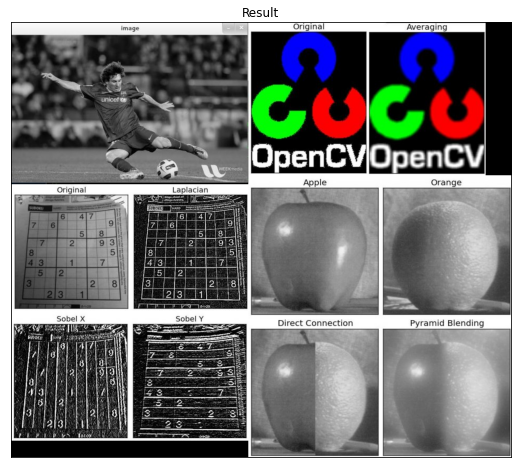

In [ ]:
imcolor_5 = readIm(get_image("orapple.jpg"),0)
vim=[imcolor_4,imcolor_5,imcolor_2,imcolor_1]
outIm=displayMI_NES(vim,row_size=2,minimized=True,to_gray=False)
displayIm(outIm,factor=2)

---

Con más imágenes sería algo así: 

[WARNING]: Amount of rows needed:  3
[WARNING]: The order to minimize filling is:  [0, 1, 2, 3, 4]
[WARNING]: These are the estimated sizes: 1079 950
[WARNING]: Canvas resizing needed:  1502 950
[WARNING]: Image is in Color
[WARNING]: Normalizing globally


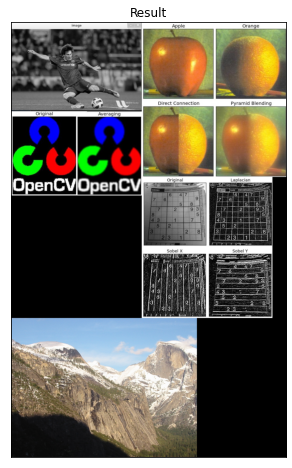

In [ ]:
imcolor_1 = readIm(get_image('dave.jpg'))
imcolor_2 = readIm(get_image('logoOpenCV.jpg'))
imcolor_3 = readIm(get_image('orapple.jpg'))
imcolor_4 = readIm(get_image('messi.jpg'))
imcolor_5 = readIm(get_image('yosemite1.jpg'))
vim=[imcolor_4,imcolor_3,imcolor_2,imcolor_1,imcolor_5]
#_, temp = getSelection(vim,row_size=2)
#for t in temp:
  #print(t.shape)
outIm=displayMI_NES(vim,row_size=2,minimized=True)
displayIm(outIm,factor=2)

# Exercise 4

Write a function that modifies the color in an image for each of the pixel coordinates included in a list. Specifically, students must insert a green square with a side of 50 pixels in the center of the image. The key idea of this exercise is to understand how to modify the pixel values in an image (a 2D spatial array of pixels, where each pixel is defined by one (illumination in grayscale) or three values (RGB-color)).

#### Solution



Este ejercicio es bastante sencillo. Tras haber visto la estructura de datos que se suele utilizar para las imagenes, sabemos que podemos modificar fácilmente sus valores y por ello lo que se muestra en pantalla.

Para poder introducir un cuadrado verde en la imagen solamente tenemos que establecer el lado de este mismo y dónde vamos a introducirlo. Una vez determinado solo tenemos que acceder a esas posiciones en la matriz y sobre-escribir los valores. 

[WARNING]: Image is in Color
[WARNING]: Normalizing globally


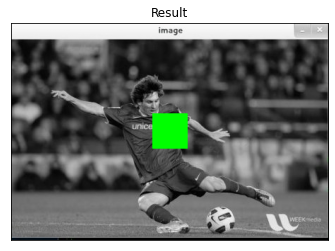

In [ ]:
def changePixelValues(im,cp,nv):
  # cp is a vector of pixel coordinates
  # nv is a vector with the new values
  # replace the values of cp with the nv values
  if len(cp)!=len(nv):
    print("[ERROR]: Coordinates Vector doesn't match Values Vector") 
    return -1 
  else: 
    img = im.astype(np.float64)
    for i,pos in enumerate(cp): 
      img[pos[0],pos[1]] = nv[i]

  return displayIm(img)

im = readIm(get_image('messi.jpg'))
# create the list of points with the requested shape
lado = 50 
nv = []
cp = [] 
for i in range(0,lado): 
  for j in range(0,lado): 
    cp.append([int(im.shape[0]/2.0)-25+i,int(im.shape[1]/2.0)-25+j])
    nv.append([0,255,0])
cp = np.array(cp,dtype=object) 
nv = np.array(nv,dtype=object) 
changePixelValues(im,cp,nv) 

Como vemos hemos podido pintar correctamente el cuadrado en el centro de la imagen. Que conste que para centrar el cuadrado hay que ir a la posición equivalente al tamaño de la imagen dividido entre dos menos la mitad del lado que compone el cuadrado. 

El color verde como hemos visto anteriormente consiste en (0,255,0) 

---

# Exercise 5

Write a function (`print_images_titles`) able to display multiple images, within the same canvas, including specific titles for each one of them. The main novelty of this exercise, with respect to Exercise 3, is the fact of adding a title for each subimage. `print_images_titles` is fed with a list of images and a list of titles. `matplotlib` functions like `add_subplot` or `subplot` can help in this regard.

#### Solution

Para este ejercicio solo tenemos que recordar de prácticas anteriores que matplotlib nos permite crear subfiguras y ejes para cada una de las gráficas,imagenes o cualquier cosa que vayamos dibujar. 

Con esa información sabemos que podemos concatener fácilmente las imágenes. Además, si guardamos la referencia de la subfigura que insertamos en matplotlib podemos editar sus propiedades como es el título. 

[Subplot matplotlib](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html) [Ejemplo de subplot](https://stackoverflow.com/questions/46615554/how-to-display-multiple-images-in-one-figure-correctly)

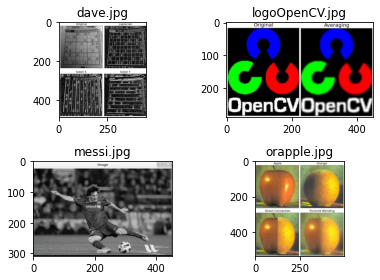

In [ ]:
def print_images_titles(vim, titles=None, rows=2):
    # TO BE FILLED BY THE STUDENT
  cols = int(len(vim)/rows+0.5) 
  fig= plt.figure()
  axs = []
  for i,img in enumerate(vim): 
    axs.append(fig.add_subplot(rows,cols,i+1))
    axs[-1].set_title(titles[i]) 
    plt.imshow(img)
  plt.tight_layout()

im1 = readIm(get_image('dave.jpg'))
im2 = readIm(get_image('logoOpenCV.jpg'))
im3 = readIm(get_image('messi.jpg'))
im4 = readIm(get_image('orapple.jpg'))
vim = [im1, im2, im3, im4]    
titles = ['dave.jpg','logoOpenCV.jpg','messi.jpg','orapple.jpg']

print_images_titles(vim, titles)

Una de las cosas importante es el uso de "plt.tight_layout()" para ajustar el espaciado entre imagenes. Como vemos hemos obtenido el resultado que se esperaba de concatener las imagenes con sus respectivos títulos. 